# Principal Component Analysis

PCA tested on PERFORM dataset. PERFORM is an European Geothermica project aiming at minimizing operational challenges, such as scaling and corrosion in geothermal fields. A database for plants, wellbores, brine, brine particle analysis and mineral compositions was collected and disseminated publicly which can be found here:
https://www.geothermperform.eu/download/
<br> <br>
In this Notebook we aim to apply a clustering on the brine composition database (a simplified version) to find relations between similar plants in terms of their fluid compositions and eventually operational challenges. 
<br> <br>
For more information or acquiring the simplified database, you can contact:
Pejman Shoeibi Omrani, pejman.shoeibiomrani@tno.nl

In [1]:
from sklearn.decomposition import PCA
import pylab as pl
import pandas as pd
from sklearn.preprocessing import StandardScaler

Loading the dataset

In [2]:
# Use database 4: only brine or 6: brine and gas composition
data = pd.read_csv("PCA_database4.csv",encoding = "ISO-8859-1")
data = data.dropna()

In [3]:
data.describe()

,sample_id,pH,Hydrogen Carb. mg/l,Cl mg/l,SO4 mg/l,Na mg/l,Ca mg/l,Mg mg/l,Sr mg/l,K mg/l,Mn mg/l,Ba mg/l,Pb mg/l,Label
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,169.784810,7.073165,471.327848,60199.451899,277.625063,22093.683544,13504.188608,526.607595,1296.845570,553.872152,57.240823,47.348228,22.521206,5.151899
std,77.360573,0.695230,329.798678,67050.346755,322.648884,23817.617541,20695.652714,866.182520,1819.583984,825.034749,81.553362,39.020510,52.398192,2.207729
min,54.000000,5.560000,28.600000,21.000000,0.080000,209.000000,0.700000,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,104.500000,6.560000,207.500000,391.000000,67.000000,454.500000,28.650000,7.650000,200.000000,46.100000,6.000000,12.500000,0.070000,4.000000
50%,221.000000,6.890000,421.000000,636.000000,210.000000,604.000000,52.000000,49.000000,944.000000,75.000000,12.100000,44.700000,0.200000,7.000000
75%,240.500000,7.590000,575.000000,134700.000000,325.000000,44470.000000,20702.500000,1042.000000,1773.500000,633.000000,80.950000,76.000000,1.150000,7.000000
max,260.000000,8.610000,1074.000000,164565.500000,2200.000000,55900.000000,54800.000000,3020.000000,13888.000000,3600.000000,227.000000,140.000000,163.000000,7.000000


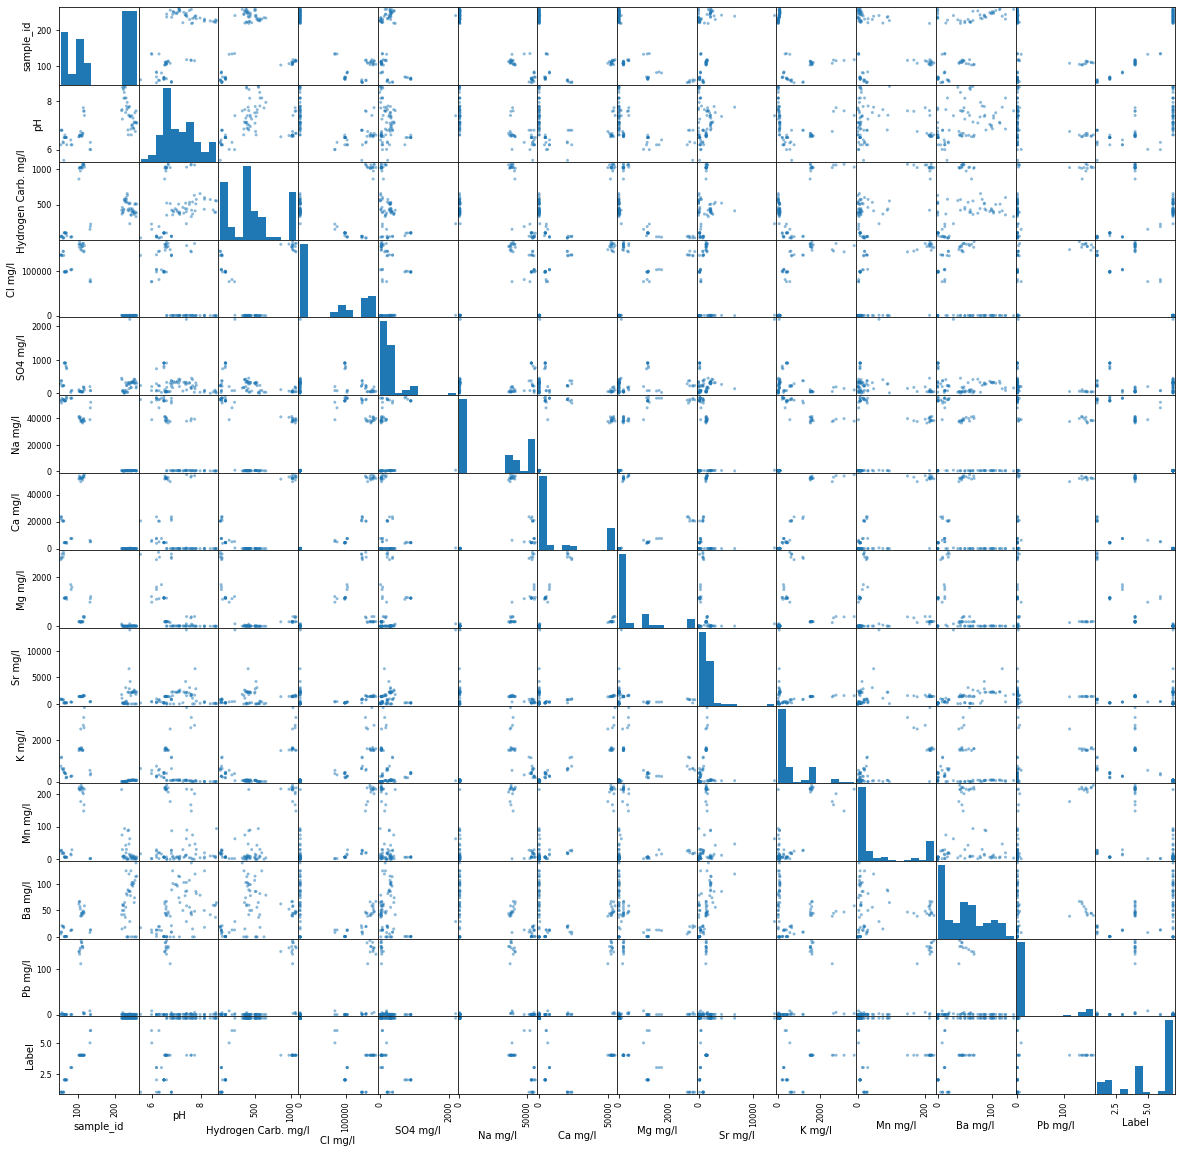

In [5]:
from pandas.plotting import scatter_matrix
scatter_matrix(data,figsize=(20,20));

In [29]:
features = data[['SO4 mg/l','Na mg/l','Ca mg/l','Mg mg/l','Sr mg/l','K mg/l',
         'Mn mg/l','Ba mg/l','Pb mg/l']]
X = features.to_numpy()
#X = StandardScaler().fit_transform(features)

In [30]:
pca = PCA(n_components=2, whiten=True).fit(X)
X_pca = pca.transform(X)

Explained variance is a measure to quantify how much of the data is covered with the PCA

In [31]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.7756336  0.22093447]
0.9965680707746034


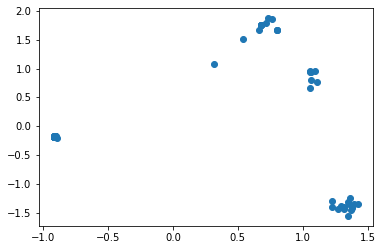

In [32]:
%matplotlib inline
from pylab import *
pl.scatter(X_pca[:, 0], X_pca[:, 1])
plt.show()

In [33]:
print(pca.components_)

[[-7.23291189e-04  7.90401251e-01  6.11793331e-01  1.74774058e-02
  -1.16284780e-02  2.30025774e-02  1.72771774e-03 -5.87221771e-04
   1.06286633e-03]
 [ 9.22013622e-03  6.10924152e-01 -7.89771827e-01  3.56639976e-02
  -2.93513517e-02 -2.81693675e-02 -3.81364845e-03 -1.19916390e-03
  -2.05266273e-03]]


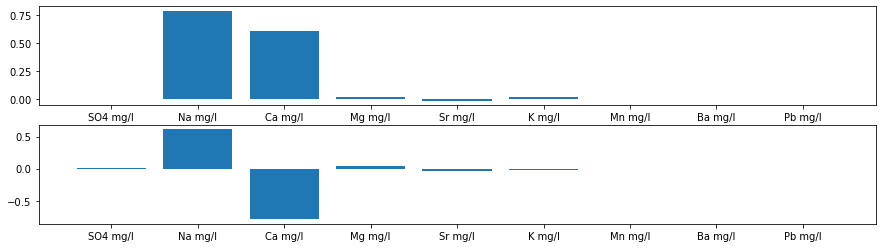

In [34]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(15,4))
ax1.bar(features.columns,pca.components_[0,:])
ax2.bar(features.columns,pca.components_[1,:])
plt.show()

([<matplotlib.axis.XTick at 0x1bc340d0>,
 [Text(0, 0, ''), Text(0, 0, '')])

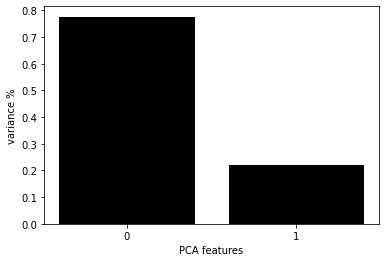

In [36]:
pca_features = range(pca.n_components_)
plt.bar(pca_features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(pca_features)

Apply KMeans clustering on the feature reduced samples

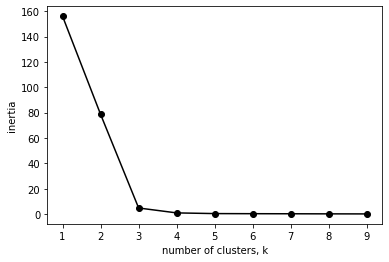

In [37]:
from sklearn.cluster import KMeans
ks = range(1, 10)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(X_pca)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [38]:
model.labels_

array([6, 6, 6, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 7, 7, 7, 7,
       7, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 8, 5, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [39]:
model_opt = KMeans(n_clusters=5)
model_opt.fit(X_pca)
model_opt.labels_

array([0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 3, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

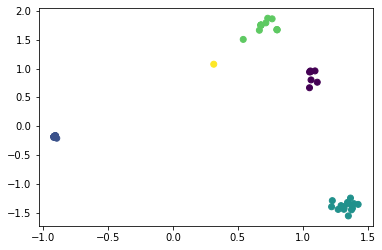

In [40]:
pl.scatter(X_pca[:, 0], X_pca[:, 1], c= model_opt.labels_)
plt.show()

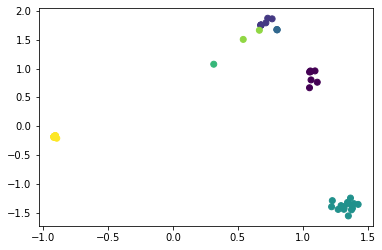

In [42]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= data['Label'])

#### Assignment
<br> <br>
Apply a feature reduction and/or clustering on the full database of PERFORM (brine_analyses.xlsx) and send your best results to: <br>
pejman.shoeibiomrani@tno.nl